In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [27]:
from Tools.Dataloader import datasets_loader
train_loader, valid_loader, test_loader = datasets_loader()

## Hyper-parameters

In [19]:
hyperparams = {'num_epochs': 10,
               'lr0' :0.1, 
               'save_checkpoint': False
                  }
cuda_available = torch.cuda.is_available()


## Creating the model

In [20]:
from Classifier.XavierCNN import XavierClassifier

model = XavierClassifier()

if cuda_available:
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=hyperparams['lr0'])
criterion = nn.CrossEntropyLoss()

In [21]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
   GaussianDropout-3           [-1, 16, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]           4,640
              ReLU-5           [-1, 32, 64, 64]               0
         MaxPool2d-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          18,496
              ReLU-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,856
             ReLU-10          [-1, 128, 32, 32]               0
        MaxPool2d-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,584
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

## Training 

In [22]:
from Tools.Trainer import Trainer

trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)
nll_train, nll_valid, acc_train, acc_valid =  trainer.train_model()
print('Done...')

------ Epoch # 1 ------
 Iteration 40: TRAIN 0.6944
 Iteration 80: TRAIN 0.6865
 Iteration 120: TRAIN 0.6839
------ Epoch # 2 ------
 Iteration 160: TRAIN 0.6760
 Iteration 200: TRAIN 0.6654
 [Loss] TRAIN 0.6621 / VALID 0.6578
 [ACC] TRAIN 0.5865 / VALID 0.5866
 Iteration 240: TRAIN 0.6531
 Iteration 280: TRAIN 0.6515
------ Epoch # 3 ------
 Iteration 320: TRAIN 0.6313
 Iteration 360: TRAIN 0.6332
 Iteration 400: TRAIN 0.6051
 [Loss] TRAIN 0.5921 / VALID 0.5922
 [ACC] TRAIN 0.6915 / VALID 0.6987
 Iteration 440: TRAIN 0.6140
------ Epoch # 4 ------
 Iteration 480: TRAIN 0.6089
 Iteration 520: TRAIN 0.5866
 Iteration 560: TRAIN 0.5890
------ Epoch # 5 ------
 Iteration 600: TRAIN 0.5809
 [Loss] TRAIN 0.5502 / VALID 0.5578
 [ACC] TRAIN 0.7237 / VALID 0.7237
 Iteration 640: TRAIN 0.5743
 Iteration 680: TRAIN 0.5654
 Iteration 720: TRAIN 0.5644
------ Epoch # 6 ------
 Iteration 760: TRAIN 0.5469
 Iteration 800: TRAIN 0.5371
 [Loss] TRAIN 0.5116 / VALID 0.5110
 [ACC] TRAIN 0.7501 / VALID 0

## Visualization

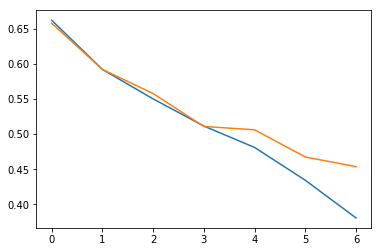

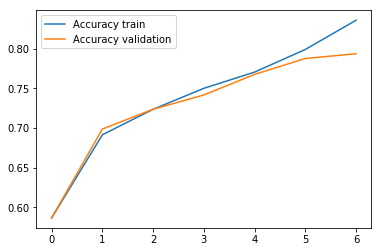

In [23]:
import Tools.Visualization as V

V.plots(nll_train, nll_valid, acc_train, acc_valid)

## Generate Submission

In [28]:
import Tools.Trainer as T
results = T.predict_test_set(test_loader)
T.generate_submission(results)

FileNotFoundError: Traceback (most recent call last):
  File "/home/mehrzaed/Software/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/mehrzaed/Software/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/mehrzaed/Workspace/IFT6135/IFT6135-P1_MLP-MNIST-CNN/Dog-Vs-Cat/Tools/Dataloader.py", line 24, in __getitem__
    img = Image.open(self.__xs[index])
  File "/home/mehrzaed/Software/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 2609, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: './data/testset/1.jpg'
